<a href="https://colab.research.google.com/github/Meiyanathan7/nmphase2/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

Confusion Matrix:
 [[0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 0]]


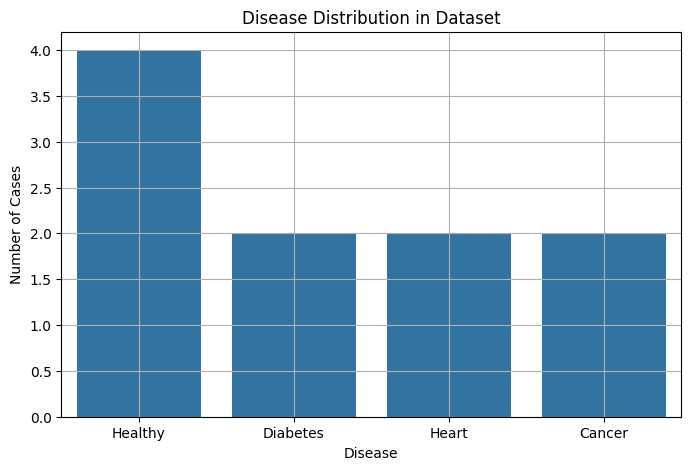

Predicted Disease: Heart


In [ ]:
# ✅ Step 1: Install dependencies (if not pre-installed)
!pip install pandas numpy matplotlib seaborn scikit-learn

# ✅ Step 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Step 3: Simulate dataset (replace this with actual dataset later)
data = {
    'Age': [45, 54, 38, 29, 61, 47, 34, 59, 40, 52],
    'Gender': ['M', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M'],
    'Smoking': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
    'Exercise': [0, 1, 0, 1, 0, 1, 1, 0, 0, 1],
    'Cholesterol': [210, 180, 250, 190, 300, 240, 200, 230, 260, 220],
    'Disease': ['Diabetes', 'Healthy', 'Heart', 'Healthy', 'Cancer', 'Diabetes', 'Healthy', 'Heart', 'Cancer', 'Healthy']
}
df = pd.DataFrame(data)
df.head()

# ✅ Step 4: Data Preprocessing
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # M=1, F=0
df['Disease'] = le.fit_transform(df['Disease'])  # Encoded target variable

X = df.drop('Disease', axis=1)
y = df['Disease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ✅ Step 6: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Step 7: Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ✅ Step 8: Bar Chart Visualization
disease_counts = df['Disease'].value_counts()
labels = le.inverse_transform(disease_counts.index)

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=disease_counts.values)
plt.title("Disease Distribution in Dataset")
plt.xlabel("Disease")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

# ✅ Step 9: Sample Prediction
sample = pd.DataFrame([[50, 1, 1, 0, 260]], columns=['Age', 'Gender', 'Smoking', 'Exercise', 'Cholesterol'])
sample_scaled = scaler.transform(sample)
predicted_class = model.predict(sample_scaled)
print("Predicted Disease:", le.inverse_transform(predicted_class)[0])
